In [3]:
import pandas as pd

# Cargar los datos
# 2023
taxis_mayo_2023 = pd.read_parquet("Datasets/yellow_tripdata_2023-05.parquet")
taxis_junio_2023 = pd.read_parquet("Datasets/yellow_tripdata_2023-06.parquet")
taxis_julio_2023 = pd.read_parquet("Datasets/yellow_tripdata_2023-07.parquet")
taxis_agosto_2023 = pd.read_parquet("Datasets/yellow_tripdata_2023-08.parquet")
taxis_septiembre_2023 = pd.read_parquet("Datasets/yellow_tripdata_2023-09.parquet")
taxis_octubre_2023 = pd.read_parquet("Datasets/yellow_tripdata_2023-10.parquet")
taxis_noviembre_2023 = pd.read_parquet("Datasets/yellow_tripdata_2023-11.parquet")
taxis_diciembre_2023 = pd.read_parquet("Datasets/yellow_tripdata_2023-12.parquet")
# 2024
taxis_enero_2024 = pd.read_parquet("Datasets/yellow_tripdata_2024-01.parquet")
taxis_febrero_2024 = pd.read_parquet("Datasets/yellow_tripdata_2024-02.parquet")
taxis_marzo_2024 = pd.read_parquet("Datasets/yellow_tripdata_2024-03.parquet")
taxis_abril_2024 = pd.read_parquet("Datasets/yellow_tripdata_2024-04.parquet")


In [4]:
for dataset in [taxis_mayo_2023,taxis_junio_2023,taxis_julio_2023,taxis_agosto_2023,taxis_septiembre_2023,taxis_octubre_2023,taxis_noviembre_2023,taxis_diciembre_2023, taxis_enero_2024, taxis_febrero_2024,taxis_marzo_2024, taxis_abril_2024]:
    print(dataset["tpep_pickup_datetime"].head(1))

0   2023-05-01 00:33:13
Name: tpep_pickup_datetime, dtype: datetime64[us]
0   2023-06-01 00:08:48
Name: tpep_pickup_datetime, dtype: datetime64[us]
0   2023-07-01 00:29:59
Name: tpep_pickup_datetime, dtype: datetime64[us]
0   2023-08-01 00:26:44
Name: tpep_pickup_datetime, dtype: datetime64[us]
0   2023-09-01 00:15:37
Name: tpep_pickup_datetime, dtype: datetime64[us]
0   2023-10-01 00:16:44
Name: tpep_pickup_datetime, dtype: datetime64[us]
0   2023-11-01 00:03:03
Name: tpep_pickup_datetime, dtype: datetime64[us]
0   2023-12-01 00:06:06
Name: tpep_pickup_datetime, dtype: datetime64[us]
0   2024-01-01 00:57:55
Name: tpep_pickup_datetime, dtype: datetime64[us]
0   2024-02-01 00:04:45
Name: tpep_pickup_datetime, dtype: datetime64[us]
0   2024-03-01 00:18:51
Name: tpep_pickup_datetime, dtype: datetime64[us]
0   2024-04-01 00:02:40
Name: tpep_pickup_datetime, dtype: datetime64[us]


In [5]:
registros_taxis = pd.concat([taxis_mayo_2023,taxis_junio_2023,taxis_julio_2023,taxis_agosto_2023,taxis_septiembre_2023,taxis_octubre_2023,taxis_noviembre_2023,taxis_diciembre_2023, taxis_enero_2024, taxis_febrero_2024,taxis_marzo_2024, taxis_abril_2024])

In [6]:
registros_taxis = registros_taxis.drop(columns=['VendorID', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],)

In [7]:
registros_taxis.max()

tpep_pickup_datetime   2024-05-01 00:02:36
dtype: datetime64[us]

In [8]:
registros_taxis = registros_taxis[(registros_taxis["tpep_pickup_datetime"] >= "2023-05-01") & (registros_taxis["tpep_pickup_datetime"] < "2024-05-01")]

In [9]:
registros_taxis.max()

tpep_pickup_datetime   2024-04-30 23:59:59
dtype: datetime64[us]

In [10]:
# Convertir la columna a datetime si aún no lo está
registros_taxis['tpep_pickup_datetime'] = pd.to_datetime(registros_taxis['tpep_pickup_datetime'])

In [11]:

conteo_dias = registros_taxis.groupby(registros_taxis['tpep_pickup_datetime'].dt.date).size()

data = {
    'fecha': conteo_dias.index,
    'valor': conteo_dias.values
}
df = pd.DataFrame(data)

# Establecer la fecha como índice
df.set_index('fecha', inplace=True)
df

,valor
fecha,
2023-05-01,99693
2023-05-02,115039
2023-05-03,119562
2023-05-04,126709
2023-05-05,121662
...,...
2024-04-26,113011
2024-04-27,117875
2024-04-28,99321


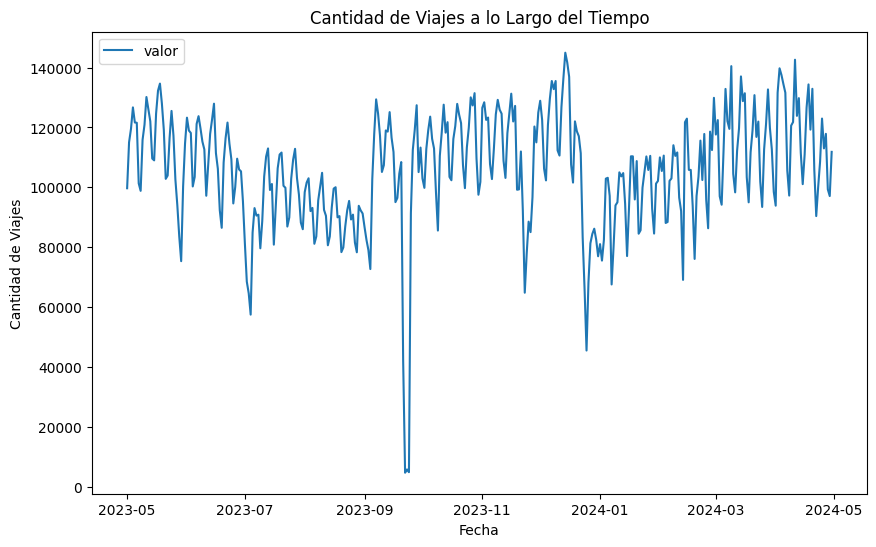

In [12]:
import matplotlib.pyplot as plt

# Visualizar los datos
df.plot(figsize=(10, 6))
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Viajes')
plt.title('Cantidad de Viajes a lo Largo del Tiempo')
plt.show()


In [13]:
df[df["valor"] < 20000] # Hay outliers

,valor
fecha,
2023-09-22,4633
2023-09-23,5732
2023-09-24,4813


In [14]:
# Dividir los datos en entrenamiento y prueba
train = df.iloc[:-60]  # Usamos todos menos los últimos 60 días para entrenar
test = df.iloc[-60:]   # Usamos los últimos 60 días para probar


/home/juank/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/juank/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/juank/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/juank/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/juank/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invert

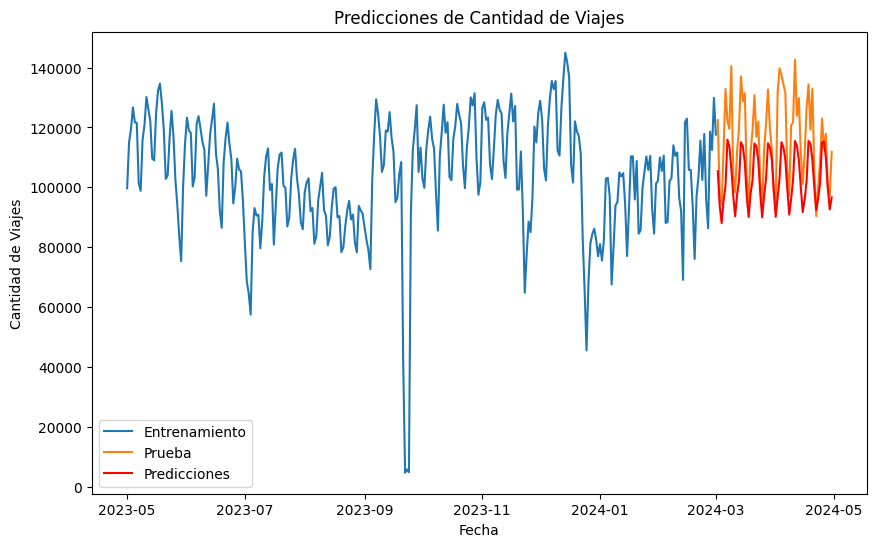

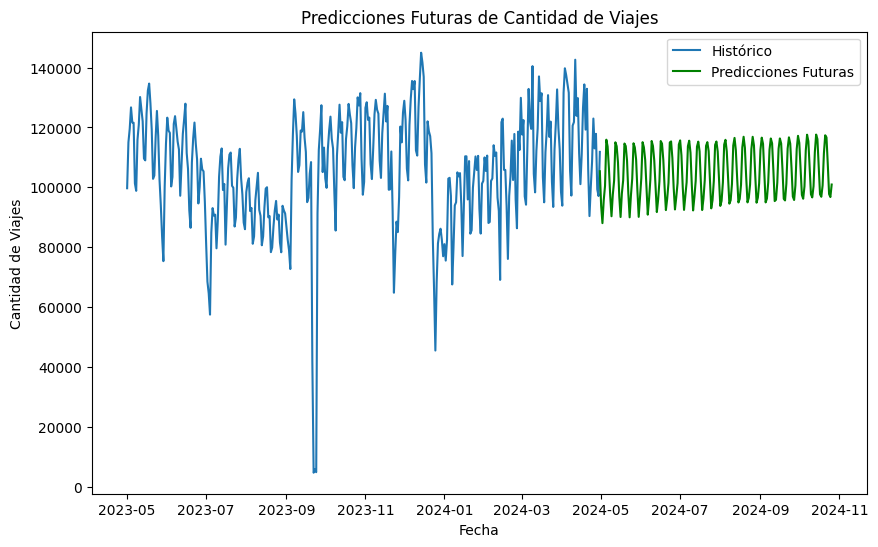

In [15]:
# Primera parte
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARIMA
model = ARIMA(train, order=(10, 2, 14.))  # Los parámetros (p,d,q) deben ajustarse según tus datos
model_fit = model.fit()

# Hacer predicciones
predictions = model_fit.forecast(steps=len(test))

# Visualizar las predicciones junto con los datos reales
plt.figure(figsize=(10, 6))
plt.plot(train, label='Entrenamiento')
plt.plot(test, label='Prueba')
plt.plot(test.index, predictions, label='Predicciones', color='red')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Viajes')
plt.title('Predicciones de Cantidad de Viajes')
plt.legend()
plt.show()


# Segunda parte
# Predecir los próximos 30 días
future_predictions = model_fit.forecast(steps=180)

# Guardar las predicciones en un archivo CSV para ser usado para el deployment

future_predictions.to_csv('Datasets/modelo_arima.csv', index=False)

# Visualizar las predicciones futuras
plt.figure(figsize=(10, 6))
plt.plot(df, label='Histórico')
plt.plot(pd.date_range(start=df.index[-1], periods=180, freq='D'), future_predictions, label='Predicciones Futuras', color='green')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Viajes')
plt.title('Predicciones Futuras de Cantidad de Viajes')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
print(f'MSE: {mse}')
print(f'MAE: {mae}')

MSE: 259966501.48144147
MAE: 13236.041792466913


In [17]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df["valor"], autolag = "AIC")

In [18]:
(dftest[1])

0.0018924632046173724